In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
import numpy as np
pyo.init_notebook_mode(connected=True)

- Leitura de dados e processamento

In [11]:
df_raw = pd.read_csv('ribeiroGon.csv', index_col = 0)
df_raw = df_raw.reset_index(drop=True)

In [12]:
df_raw.head(1)

,month,year,vazao,data_ticks
0,1,1966,230.477,1966-1


In [13]:
df_raw.tail(1)

,month,year,vazao,data_ticks
634,10,2018,136.705,2018-10


- Adicionando index temporal (1966-01-01 a 2018-10-01)

In [23]:
df = df_raw[['vazao']]
df.index = pd.DatetimeIndex(freq = 'm', start = '1966-01-01', periods = len(df))

/home/blamassa/.virtualenvs/enacom/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.



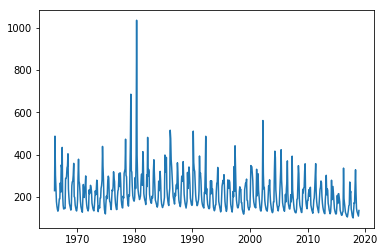

In [24]:
plt.plot(df);

### Decomposição

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,7

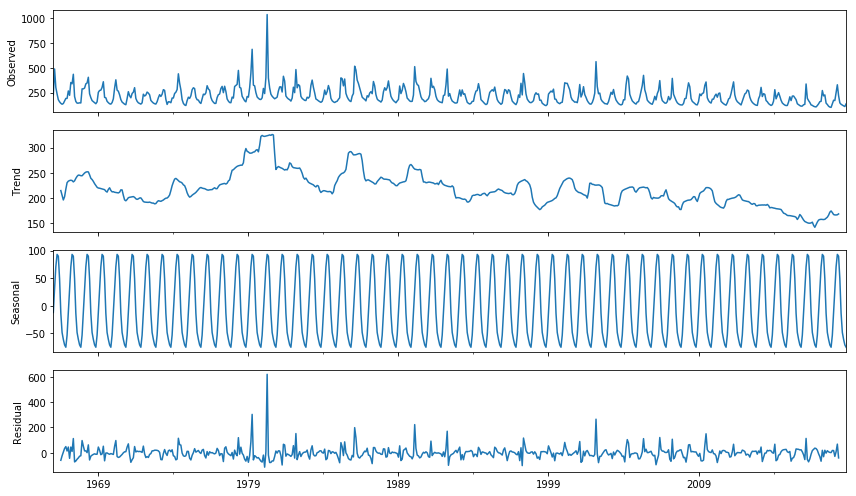

In [27]:
result = seasonal_decompose(df['vazao'])
result.plot();

O termo sazonal possui magnetude bastante relevate! Alto indício de sazonalidade.

### ACF, PAFC e Lag-plot

In [28]:
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

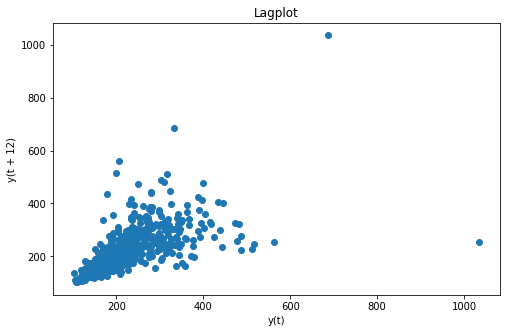

In [54]:
rcParams['figure.figsize'] = 8,5
lag_plot(df['vazao'], lag = 12)
plt.title('Lagplot');

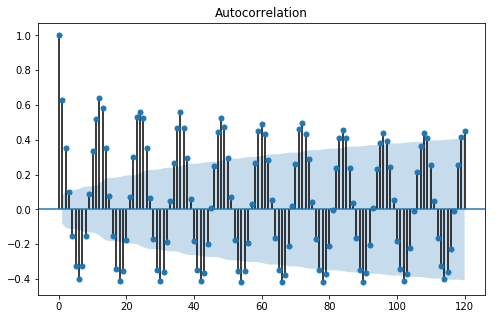

In [50]:
plot_acf(df['vazao'], lags = 120)
plt.show()

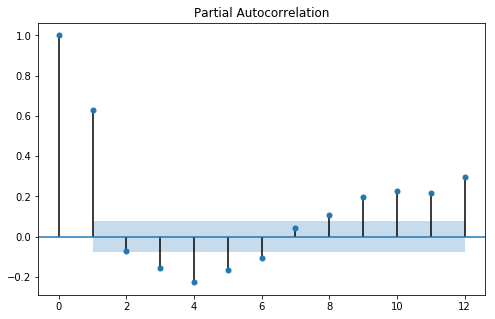

In [52]:
plot_pacf(df['vazao'], lags=12)
plt.show()